<h1 style="font-size:30px;text-align:center;color:blue"><b>Titanic Survival Classification</b></h1>

### 01. Problem Statement
 Make a system which tells whether the person
 will be save from sinking. What factors were
 most likely lead to success-socio-economic
 status, age, gender and more.

### 02.Data Collection

In [ ]:
#Load the dataset 
import pandas as pd

df=pd.read_csv("Titanic-Dataset.csv")
df.head()

### 03.Data Preprocessing

In [ ]:
##information
print(df.info())
df.shape

In [ ]:
df['Embarked'].unique()

In [ ]:
df.columns ## for display the columns

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
print(df['Embarked'].value_counts())
df['Embarked'].unique()

In [ ]:
df["Survived"].value_counts() # for checking the inbalance data ?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Survived",data=df)
plt.title("Count of passengers who survived..!")
plt.show()

In [ ]:
print(df['Sex'].value_counts())
fig,axes=plt.subplots(1,2,figsize=(5,3))
df['Sex'].value_counts().plot(kind='bar', ax=axes[1],color=['blue','green'])
df['Sex'].value_counts().plot(kind='pie',ax=axes[0],autopct='%0.1f',colormap="Reds")
plt.show()

In [ ]:
X=df.drop(columns=['Survived','Name','PassengerId','Ticket','Cabin'],axis=1)
y=df['Survived']
X.columns

In [30]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
re=LabelEncoder()
X['Sex']=re.fit_transform(X['Sex'])
X['Embarked']=re.fit_transform(X['Embarked'])


In [ ]:
X['Age']=X['Age'].fillna(X['Age'].mean())
X['Embarked']=X['Embarked'].fillna(X['Embarked'].mode()[0])
X.isnull().sum()
X

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title("Corelation", size=30)
plt.show()

<Axes: >

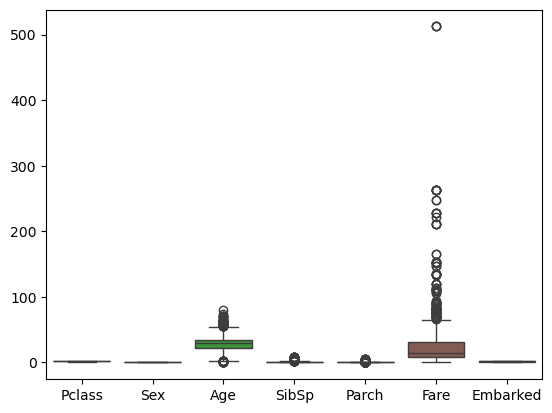

In [35]:
sns.boxplot(X)

In [ ]:
# Display age distribution based on Survived
sns.distplot(df[df['Survived'] == 1]['Age'], label='Survived')
sns.distplot(df[df['Survived'] == 2]['Age'], label = 'not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Survived')
plt.show()

In [33]:
## Spliting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 04. Choosing  a Concept(Algorithm)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)



### 05.Model Training

In [36]:
y_pred=model.predict(X_test)
# accurancy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7877094972067039


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

### 06.Model Evaluation

Text(50.722222222222214, 0.5, 'Predicted values')

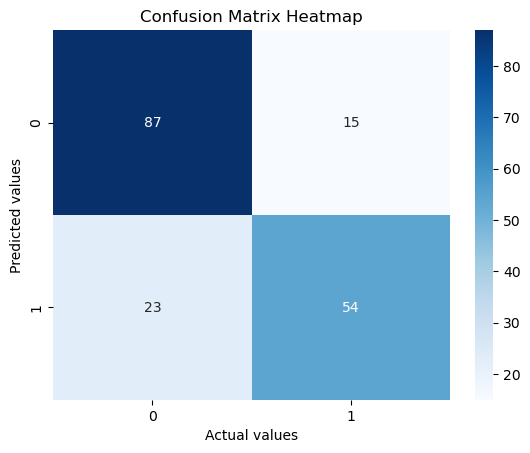

In [38]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

### 07.Parameter tuning

In [42]:
#### 01.Grid Search
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Define model and parameter grid
model = SVC(kernel='rbf', C=1.0, degree=3)
param_grid = {
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Perform grid search    
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Print best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale'}
Best score: 0.7082920092900634


In [43]:
### 02.Randomized Search
from sklearn.model_selection import RandomizedSearchCV
# Define model and parameter grid
model = SVC(kernel='rbf', C=1.0, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'random_state': [42, 43, 44],
    'gamma': ['scale', 'auto']
}

# Perform randomized search
random_search = RandomizedSearchCV(model, param_grid, cv=5, n_iter=10)
random_search.fit(X, y)

# Print best parameters
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'random_state': 43, 'gamma': 'scale', 'C': 10}
Best score: 0.7082920092900634


In [44]:
model_SVC=SVC(kernel='rbf',C=10,random_state=43,degree=2,gamma='scale')
model_SVC.fit(X_train,y_train)

SVC(C=10, degree=2, random_state=43)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_SVC.predict(X_test))

0.7486033519553073

### 08.Model Prediction

In [106]:
import pickle
# save the model
with open('model.pkl', 'wb') as f: ## you can't use close the file syntax .....!
    pickle.dump(model, f)